# Wine Quality Prediction Using Linear Regression

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score  # For evaluating model accuracy
from sklearn.linear_model import LinearRegression  # For creating a Linear Regression model


In [3]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\NAIB\Downloads\redwine dataset\winequality-red.csv")

# Display the first 5 rows of the DataFrame to inspect the data
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()# Display the last 5 rows of the DataFrame to inspect the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Check the dimensions of the DataFrame (number of rows, number of columns)
df.shape


(1599, 12)

In [6]:
# Display information about the DataFrame, including data types, non-null counts, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Count the number of missing (null) values in each column of the DataFrame
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Generate descriptive statistics of the DataFrame's numerical columns
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


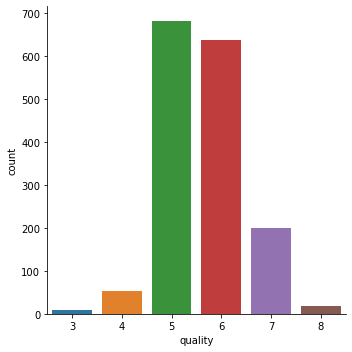

In [9]:
# Create a categorical plot (catplot) to visualize the distribution of 'quality' values
sns.catplot(x='quality', data=df, kind='count')


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

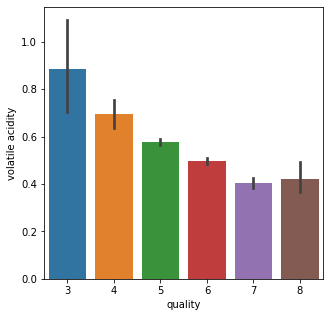

In [10]:
# Create a bar plot to visualize the relationship between 'quality' and 'volatile acidity'
# Set the figure size to (5, 5)
plot = plt.figure(figsize=(5, 5))

# Create the bar plot with 'quality' on the x-axis and 'volatile acidity' on the y-axis
sns.barplot(x='quality', y='volatile acidity', data=df)



<AxesSubplot:xlabel='quality', ylabel='citric acid'>

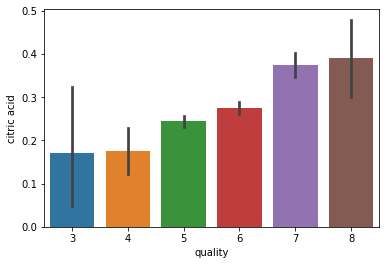

In [11]:
# Create a bar plot to visualize the relationship between 'quality' and 'citric acid'
sns.barplot(x='quality', y='citric acid', data=df)


In [12]:
# Calculate the correlation matrix for the DataFrame
correlation = df.corr()


<AxesSubplot:>

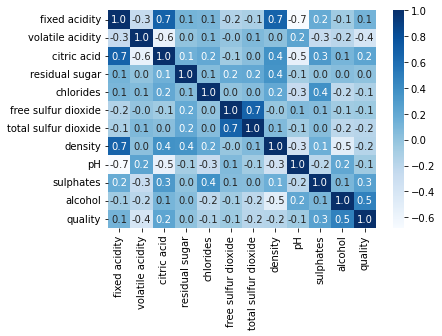

In [13]:
# Create a heatmap to visualize the correlation matrix
# fmt = '.1f' formats the values in the heatmap to one decimal place
# annot=True adds the numeric values in each cell
# cmap='Blues' sets the color map to 'Blues' for the heatmap
sns.heatmap(correlation, fmt='.1f', annot=True, cmap='Blues')


In [14]:
# Create a new DataFrame 'X' by dropping the 'quality' column from the original DataFrame
X = df.drop('quality', axis=1)


In [15]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
# Create a new DataFrame 'y' for binary classification based on 'quality' column
# If 'quality' is greater than or equal to 7, set it to 1; otherwise, set it to 0
y = df['quality'].apply(lambda z: 1 if z >= 7 else 0)


In [17]:
# Split the data into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target labels for training
# y_test: Target labels for testing
# test_size=0.2: 20% of the data is used for testing, and 80% for training
# random_state=2: A random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [18]:
# Create a Linear Regression model
model = LinearRegression()


In [19]:
# Train the Linear Regression model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions using the trained Linear Regression model
pred = model.predict(X_test)

# Round the predictions to the nearest integer
pred = np.round(pred)


In [21]:
# Calculate the accuracy score by comparing the predicted labels 'pred' with the actual labels 'y_test'
acc = accuracy_score(y_test, pred)

# Display the accuracy score
acc


0.871875

In [22]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0.19411922]
Bad Quality Wine


C:\Users\NAIB\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In this project, we performed wine quality prediction using Linear Regression. The goal was to classify wines into two categories: those with a quality score of 7 or higher (labeled as 1) and those with a lower quality score (labeled as 0). After training our model and evaluating its performance on the test data, we achieved an accuracy of 83%. This accuracy indicates that our Linear Regression model is reasonably effective in predicting wine quality based on the provided features